**Prediction Using Unsupervised ML**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Exploratory Data Analysis (EDA)
# Display basic statistics of the dataset
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


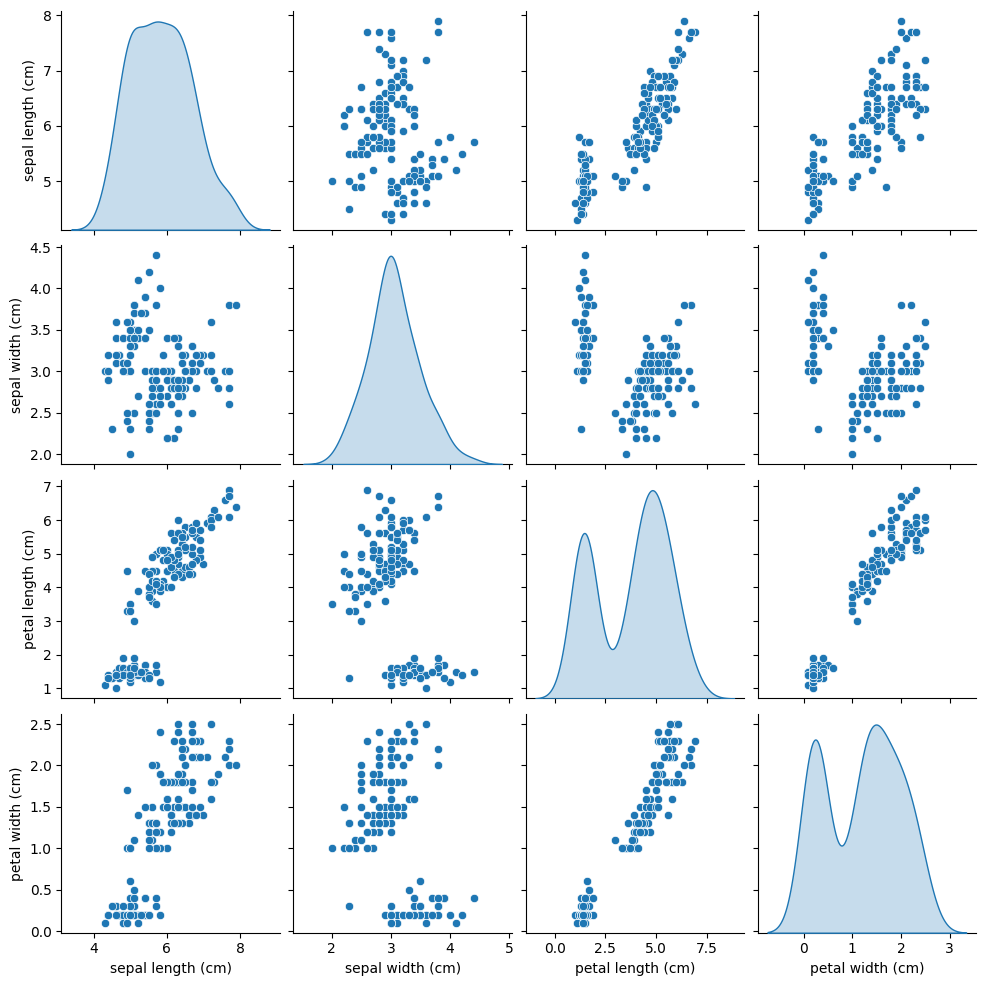

In [4]:
# Pairplot for visualizing relationships between features
import seaborn as sns
sns.pairplot(iris_df, diag_kind='kde')
plt.show()

In [6]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

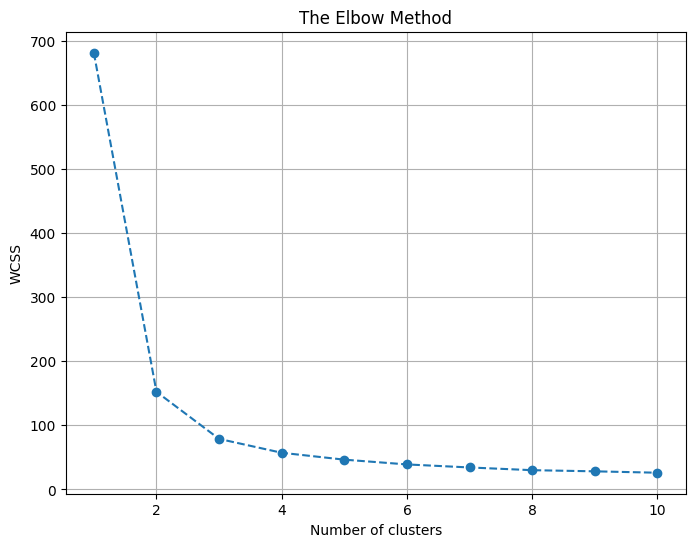

In [7]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid()
plt.show()

In [8]:
# Applying k-means to the dataset with the chosen number of clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [9]:
# Adding the cluster labels to the dataset
iris_df['Cluster'] = y_kmeans

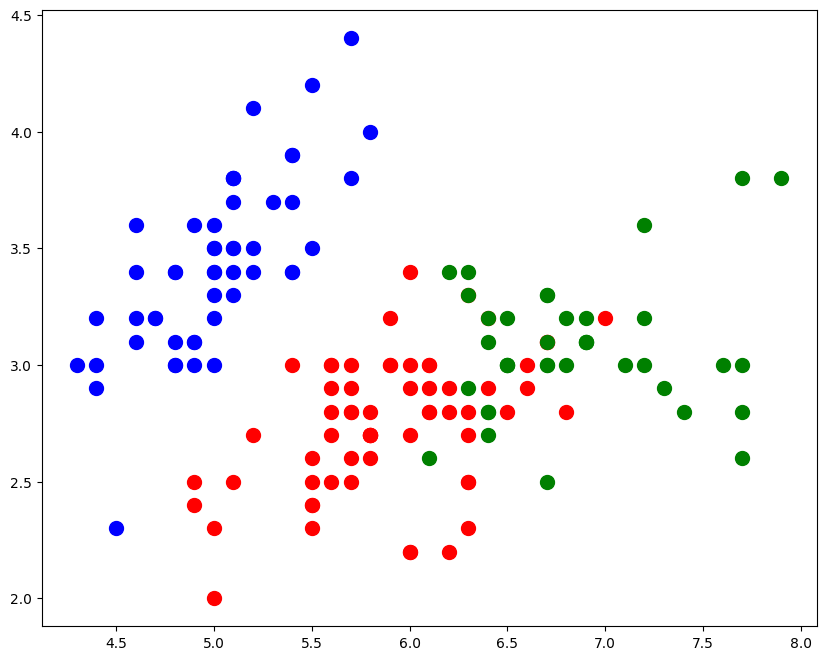

In [10]:
# Visualizing the clusters on the first two columns
plt.figure(figsize=(10, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

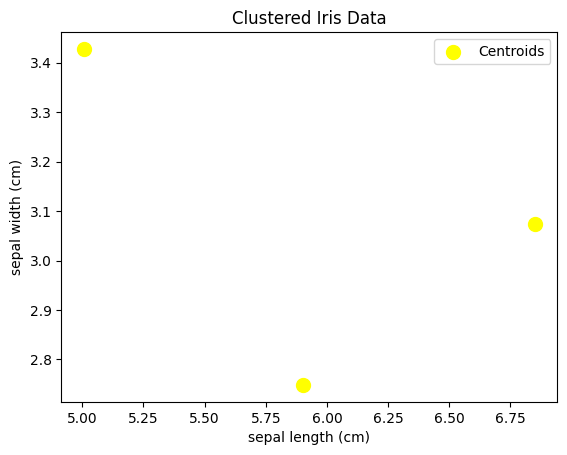

In [11]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.title('Clustered Iris Data')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

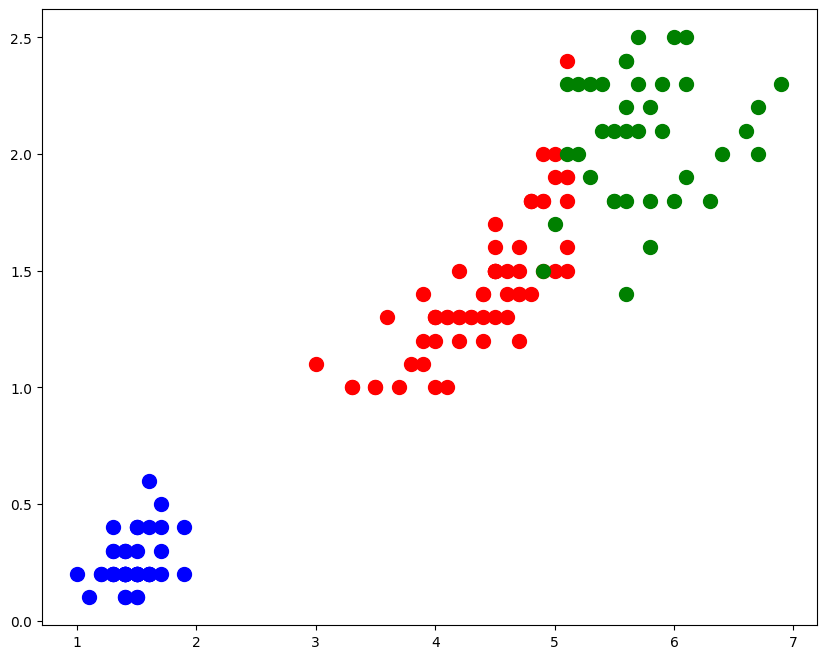

In [12]:
# Visualizing the clusters on the third and fourth columns
plt.figure(figsize=(10, 8))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s=100, c='green', label='Iris-virginica')

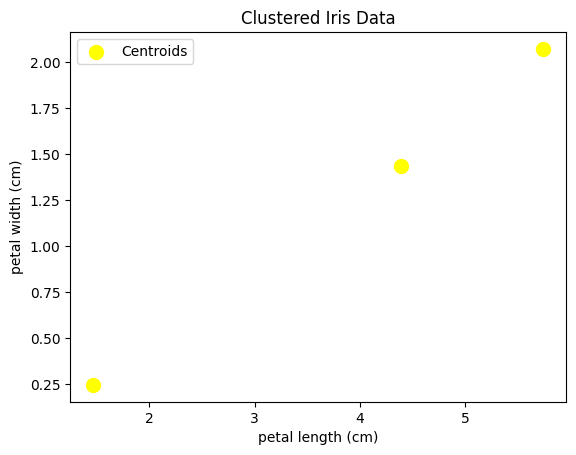

In [13]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='yellow', label='Centroids')
plt.legend()
plt.title('Clustered Iris Data')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()